In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Se lee el archivo y se le asigna la variable df9
df9 = pd.read_csv('sahuaripa', skiprows=19, sep='\s+',header=None,names=["FECHA","PRECIP","EVAP","TMAX","TMIN"])
##########dtype={'Fecha': str,'PRECIP':float,'EVAP':float,'TMAX':float,'TMIN':float}

#La columna fecha se cambia a una variable DAYTIME
df9['FECHA'] = pd.to_datetime(df9.apply(lambda x: x['FECHA'], 1), dayfirst=True)


In [3]:
pd.options.display.max_rows = 10000

In [4]:
#Se le da a df9 forma de datos
df9 = pd.DataFrame(df9)

#Seleccionamos las columnas que queremos numericas asignandoles un arreglo col
cols = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']

#Cambiamos las columnas asignadas en col a valores numericos
df9[cols] = df9[cols].apply(pd.to_numeric, errors='coerce', axis=1)

#Se muestra los tipos de variables para ver que todo sea correcto 
df9.dtypes


FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

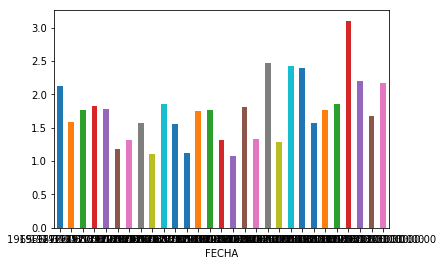

In [5]:
#Considaremos la precipitación acumulada a la suma de precipitaciones por año
#Así que hacemos una tabla
df10 = df9.set_index('FECHA').resample('Y')["PRECIP"].mean()
#Se muestra df10 que es una tabla de datos y con esto podemos ver cuales años han tenido mayor 
#precipitación 
ax = df10.plot.bar(x='PRECIP', y='FECHA', rot=0)

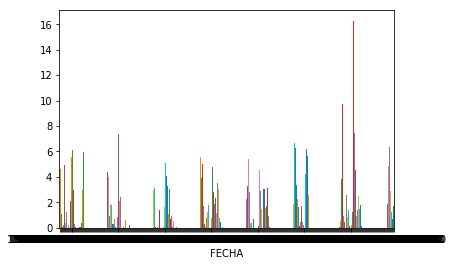

In [6]:
df11 = df9.set_index('FECHA').resample('M')["PRECIP"].mean()

axx = df11.plot.bar(x='PRECIP', y='FECHA', rot=0)

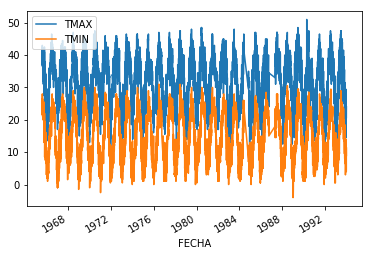

In [7]:
df9.plot(x="FECHA",y=["TMAX","TMIN"])

In [8]:
#se declara una tabla df12 y df13 que tenga el promedio de las temperaturas mensuales y anuales
df12 = df9.set_index('FECHA').resample('M')["TMAX", "TMIN"].mean()
df13 = df9.set_index('FECHA').resample('Y')["TMAX","TMIN"].mean()

In [9]:
#Transformamos nuestras nuevas columnas en datos numericos para poder generar una boxplot de ellos
cols2 = ['TMAX', 'TMIN']
df12[cols2] = df12[cols2].apply(pd.to_numeric, errors='coerce', axis=1)
df13[cols2] = df13[cols2].apply(pd.to_numeric, errors='coerce', axis=1)

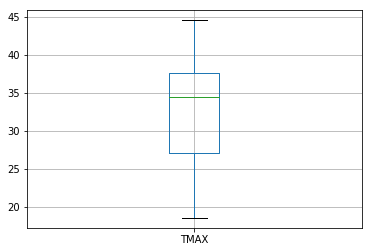

In [10]:
#DIagrama de caja de la temperatura maxima promedio por mes  
df12.boxplot(column=['TMAX'])

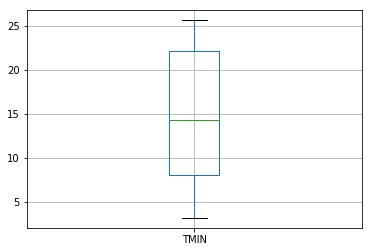

In [11]:
#Diagrama de caja de la temperatura minima promedio por mes
df12.boxplot(column=['TMIN'])

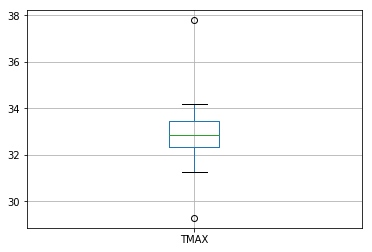

In [12]:
#Diagrama de caja de la temperatura maxima promedio por año
df13.boxplot(column=['TMAX'])

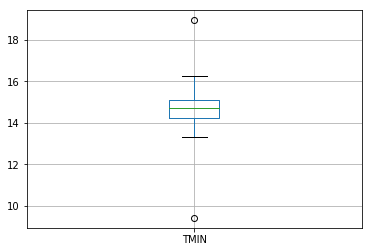

In [13]:
#Diagrama de caja de la temperatura minima promedio por año
df13.boxplot(column=['TMIN'])